# Prediction of iPhone Purchase Status

## Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time

print ("Importing librariesinto Python Environment is successful")

Importing librariesinto Python Environment is successful


## Loading the dataset into Python Environment

In [2]:
data = pd.read_csv("iphone_purchase_records.csv")

In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
data.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


## Preliminary data exploration

In [5]:
data.shape

(400, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


### Null values

In [7]:
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

### Duplicate values

In [8]:
data.duplicated().sum()

20

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

### Outliers

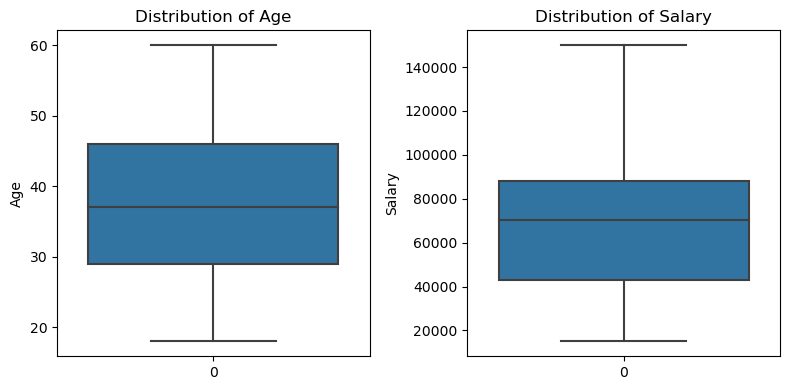

In [11]:
plt.figure(figsize = (8,4))
fig1 = plt.subplot(1,2,1)
sns.boxplot(data = data['Age'])
plt.ylabel('Age')
plt.title("Distribution of Age")

fig2 = plt.subplot(1,2,2)
sns.boxplot(data = data['Salary'])
plt.title("Distribution of Salary")
plt.ylabel('Salary')

plt.tight_layout()
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 8/Box plots.jpg")
plt.show()

## Exploratory data analysis (EDA)

In [12]:
data.describe()

,Age,Salary,Purchase Iphone
count,380.000000,380.000000,380.000000
mean,37.586842,70421.052632,0.368421
std,10.592492,34604.155483,0.483012
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70500.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Distribution of Salary across Gender

<Figure size 600x600 with 0 Axes>

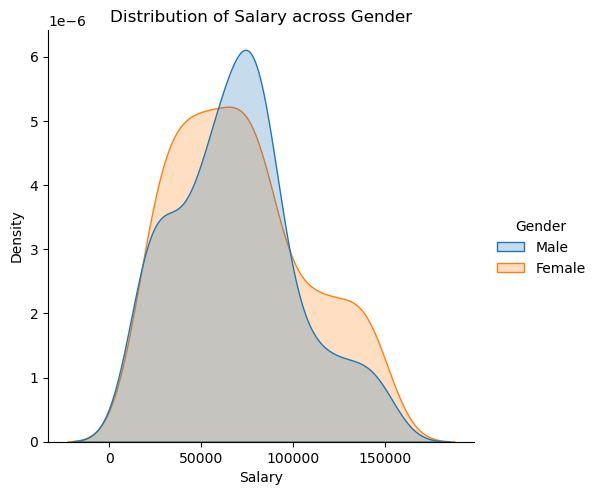

In [13]:
plt.figure (figsize = (6,6))
sns.displot(data = data, x = 'Salary', hue = 'Gender', kind = 'kde', fill = True)
plt.title ("Distribution of Salary across Gender")
plt.xlabel('Salary')
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 8/kde_salary.png")
plt.show()

<Figure size 600x600 with 0 Axes>

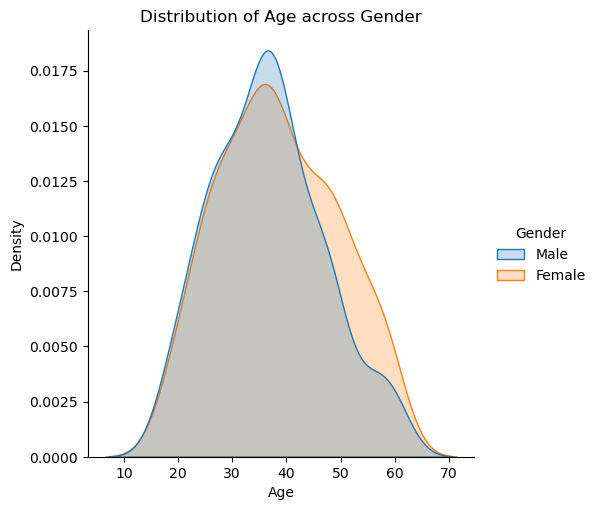

In [14]:
plt.figure (figsize = (6,6))
sns.displot(data = data, x = 'Age', hue = 'Gender', kind = 'kde', fill = True)
plt.title ("Distribution of Age across Gender")
plt.xlabel('Age')
plt.savefig("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 8/kde_age.png")
plt.show()

### Iphone puchasing across Gender

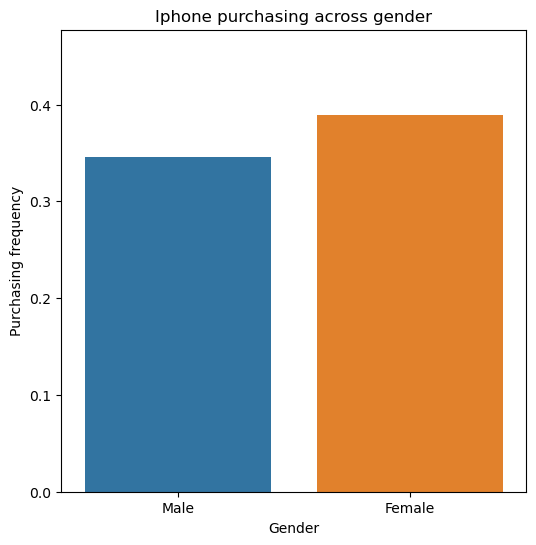

In [15]:
plt.figure(figsize = (6,6))
sns.barplot(data = data, x = 'Gender', y = 'Purchase Iphone', errwidth = 0)
plt.title ("Iphone purchasing across gender")
plt.xlabel ('Gender')
plt.ylabel('Purchasing frequency')
plt.savefig ("D:/Top Mentor_Data analytics class/01-09-2024/Assignment/Assignments/Project 8/Bar plot.png")
plt.show()

## Model development

In [16]:
data['Gender'] = data['Gender'].replace({'Female': 1, 'Male':1})

### Features and target variable

In [17]:
X = data.drop(columns = ['Purchase Iphone'])

In [18]:
y = data['Purchase Iphone']

In [19]:
X

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,1,26,43000
3,1,27,57000
4,1,19,76000
...,...,...,...
395,1,46,41000
396,1,51,23000
397,1,50,20000
398,1,36,33000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [21]:
X_train.shape

(304, 3)

In [22]:
X_test.shape

(76, 3)

In [23]:
dt = DecisionTreeClassifier(max_depth = 3, criterion='gini')

In [24]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
dt_pred = dt.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, dt_pred)*100
print (f'Accuracy of the model is: {accuracy:.2f}%')

Accuracy of the model is: 88.16%


In [27]:
report = classification_report(y_test, dt_pred)
print ("**************Classification Report********************")
print (report)

**************Classification Report********************
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        54
           1       0.71      1.00      0.83        22

    accuracy                           0.88        76
   macro avg       0.85      0.92      0.87        76
weighted avg       0.92      0.88      0.89        76



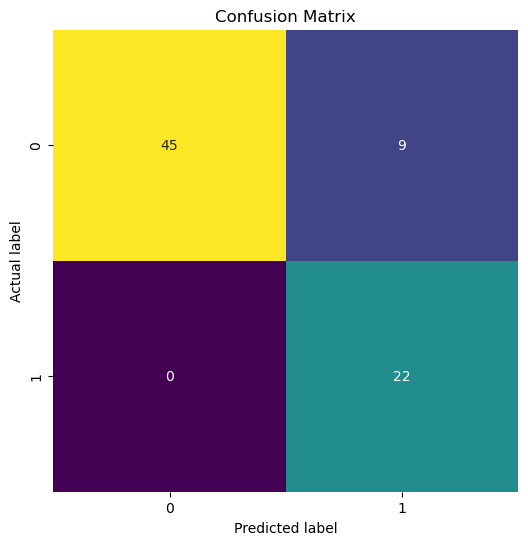

In [28]:
conf_mat = confusion_matrix (y_test, dt_pred)
plt.figure(figsize = (6,6))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()